In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np



In [2]:
lista = [
    'dados_biblioteca/emprestimos-20101.csv', 'dados_biblioteca/emprestimos-20102.csv',
    'dados_biblioteca/emprestimos-20111.csv', 'dados_biblioteca/emprestimos-20112.csv',
    'dados_biblioteca/emprestimos-20121.csv', 'dados_biblioteca/emprestimos-20122.csv',
    'dados_biblioteca/emprestimos-20131.csv', 'dados_biblioteca/emprestimos-20132.csv',
    'dados_biblioteca/emprestimos-20141.csv', 'dados_biblioteca/emprestimos-20142.csv',
    'dados_biblioteca/emprestimos-20151.csv', 'dados_biblioteca/emprestimos-20152.csv',
    'dados_biblioteca/emprestimos-20161.csv', 'dados_biblioteca/emprestimos-20162.csv',
    'dados_biblioteca/emprestimos-20171.csv', 'dados_biblioteca/emprestimos-20172.csv',
    'dados_biblioteca/emprestimos-20181.csv', 'dados_biblioteca/emprestimos-20182.csv',
    'dados_biblioteca/emprestimos-20191.csv', 'dados_biblioteca/emprestimos-20192.csv',
    'dados_biblioteca/emprestimos-20201.csv'
]

df_emprestimos = pd.concat([pd.read_csv(arquivo) for arquivo in lista], ignore_index=True)
df_emprestimos.head()
    
    

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO


In [3]:
df_exemplares = pd.read_parquet('dados_biblioteca\dados_exemplares.parquet')
df_exemplares.head()


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Gustavo Santos\AppData\Local\Temp\ipykernel_13500\199337850.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_exemplares = pd.read_parquet('dados_biblioteca\dados_exemplares.parquet')


,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


In [4]:
df_final = pd.merge(df_exemplares, df_emprestimos, on='codigo_barras')
df_final.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema,id_emprestimo,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,27,L000133_11/05/2018 08:57:56,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,691,37,818501,NaN,2010/08/17 17:00:04.440000000,2010/08/17 17:09:15.000000000,2.010060e+09,ALUNO DE GRADUAÇÃO
1,43,L000154,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,59,2037061,2015/08/24 21:55:47.110000000,2015/08/03 10:39:42.972000000,2015/10/19 08:52:30.000000000,2.013034e+09,ALUNO DE GRADUAÇÃO
2,61,L000267_14/07/2017 09:31:00,Dissertações,Biblioteca Central Zila Mamede,ESPECIAL,690,90,1212301,NaN,2012/03/30 14:35:52.264000000,2012/04/02 17:06:11.000000000,2.011096e+09,ALUNO DE GRADUAÇÃO
3,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,153,775420,2010/05/31 00:35:54.869000000,2010/05/14 17:58:11.558000000,2010/06/17 19:34:11.000000000,2.004286e+08,ALUNO DE GRADUAÇÃO
4,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,153,800617,2010/07/21 11:39:18.519000000,2010/07/06 12:24:32.049000000,2010/08/09 17:54:20.000000000,2.008032e+09,ALUNO DE GRADUAÇÃO


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072558 entries, 0 to 2072557
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_exemplar           int64  
 1   codigo_barras         object 
 2   colecao               object 
 3   biblioteca            object 
 4   status_material       object 
 5   localizacao           int64  
 6   registro_sistema      int64  
 7   id_emprestimo         int64  
 8   data_renovacao        object 
 9   data_emprestimo       object 
 10  data_devolucao        object 
 11  matricula_ou_siape    float64
 12  tipo_vinculo_usuario  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 205.6+ MB


In [6]:
df_final.isnull().sum()

id_exemplar                   0
codigo_barras                 0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
registro_sistema              0
id_emprestimo                 0
data_renovacao          1162088
data_emprestimo               0
data_devolucao             6178
matricula_ou_siape         2893
tipo_vinculo_usuario          0
dtype: int64

Limpeza de dados

aqui verifiquei que existe 20 matrículas que com valores nulos então poedmos removê-las

In [7]:
df_final.dropna(subset=['matricula_ou_siape'], inplace=True)
df_final.isnull().sum()


id_exemplar                   0
codigo_barras                 0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
registro_sistema              0
id_emprestimo                 0
data_renovacao          1159862
data_emprestimo               0
data_devolucao             6167
matricula_ou_siape            0
tipo_vinculo_usuario          0
dtype: int64

In [8]:
df_final.drop_duplicates('id_emprestimo')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2069665 entries, 0 to 2072557
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_exemplar           int64  
 1   codigo_barras         object 
 2   colecao               object 
 3   biblioteca            object 
 4   status_material       object 
 5   localizacao           int64  
 6   registro_sistema      int64  
 7   id_emprestimo         int64  
 8   data_renovacao        object 
 9   data_emprestimo       object 
 10  data_devolucao        object 
 11  matricula_ou_siape    float64
 12  tipo_vinculo_usuario  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 221.1+ MB


In [9]:
duplicatas_por_id = df_final.duplicated(subset=['id_emprestimo']).sum()
duplicatas_por_id

3833

Dia 2

In [10]:
df_final.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema,id_emprestimo,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,27,L000133_11/05/2018 08:57:56,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,691,37,818501,NaN,2010/08/17 17:00:04.440000000,2010/08/17 17:09:15.000000000,2.010060e+09,ALUNO DE GRADUAÇÃO
1,43,L000154,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,59,2037061,2015/08/24 21:55:47.110000000,2015/08/03 10:39:42.972000000,2015/10/19 08:52:30.000000000,2.013034e+09,ALUNO DE GRADUAÇÃO
2,61,L000267_14/07/2017 09:31:00,Dissertações,Biblioteca Central Zila Mamede,ESPECIAL,690,90,1212301,NaN,2012/03/30 14:35:52.264000000,2012/04/02 17:06:11.000000000,2.011096e+09,ALUNO DE GRADUAÇÃO
3,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,153,775420,2010/05/31 00:35:54.869000000,2010/05/14 17:58:11.558000000,2010/06/17 19:34:11.000000000,2.004286e+08,ALUNO DE GRADUAÇÃO
4,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,153,800617,2010/07/21 11:39:18.519000000,2010/07/06 12:24:32.049000000,2010/08/09 17:54:20.000000000,2.008032e+09,ALUNO DE GRADUAÇÃO


In [11]:
if 'registro_sistema' in df_final.columns:
    df_final = df_final.drop(columns='registro_sistema')
df_final

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,id_emprestimo,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,27,L000133_11/05/2018 08:57:56,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,691,818501,NaN,2010/08/17 17:00:04.440000000,2010/08/17 17:09:15.000000000,2.010060e+09,ALUNO DE GRADUAÇÃO
1,43,L000154,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,2037061,2015/08/24 21:55:47.110000000,2015/08/03 10:39:42.972000000,2015/10/19 08:52:30.000000000,2.013034e+09,ALUNO DE GRADUAÇÃO
2,61,L000267_14/07/2017 09:31:00,Dissertações,Biblioteca Central Zila Mamede,ESPECIAL,690,1212301,NaN,2012/03/30 14:35:52.264000000,2012/04/02 17:06:11.000000000,2.011096e+09,ALUNO DE GRADUAÇÃO
3,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,775420,2010/05/31 00:35:54.869000000,2010/05/14 17:58:11.558000000,2010/06/17 19:34:11.000000000,2.004286e+08,ALUNO DE GRADUAÇÃO
4,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,800617,2010/07/21 11:39:18.519000000,2010/07/06 12:24:32.049000000,2010/08/09 17:54:20.000000000,2.008032e+09,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...,...,...,...,...,...
2072553,26306,L113134,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,978,1692686,2014/03/08 20:51:53.033000000,2014/02/19 08:45:53.369000000,2014/04/10 16:57:17.000000000,2.013107e+09,ALUNO DE PÓS-GRADUAÇÃO
2072554,26306,L113134,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,978,1749057,NaN,2014/05/06 17:58:20.611000000,2014/05/21 13:46:22.000000000,2.012945e+09,ALUNO DE GRADUAÇÃO
2072555,26306,L113134,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,978,1777379,NaN,2014/07/18 10:49:01.626000000,2014/08/14 18:22:30.000000000,2.014116e+09,ALUNO DE PÓS-GRADUAÇÃO
2072556,26306,L113134,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,978,1807999,NaN,2014/08/19 18:33:03.179000000,2014/09/03 16:02:11.000000000,2.010053e+09,ALUNO DE GRADUAÇÃO


In [12]:
df_final['matricula_ou_siape'] = df_final['matricula_ou_siape'].map(str)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2069665 entries, 0 to 2072557
Data columns (total 12 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id_exemplar           int64 
 1   codigo_barras         object
 2   colecao               object
 3   biblioteca            object
 4   status_material       object
 5   localizacao           int64 
 6   id_emprestimo         int64 
 7   data_renovacao        object
 8   data_emprestimo       object
 9   data_devolucao        object
 10  matricula_ou_siape    object
 11  tipo_vinculo_usuario  object
dtypes: int64(3), object(9)
memory usage: 205.3+ MB


In [13]:
CDU_lista = []
for CDU in df_final['localizacao']:
    if CDU < 100:
        CDU_lista.append('Generalidades')
    elif CDU < 200:
        CDU_lista.append('Filosofia e psicologia')
    elif CDU < 300:
        CDU_lista.append('Religião')
    elif CDU < 400:
        CDU_lista.append('Ciências sociais')
    elif CDU < 500:
        CDU_lista.append('Classe vaga')
    elif CDU < 600:
        CDU_lista.append('Matemática e ciências naturais')
    elif CDU < 700:
        CDU_lista.append('Ciências aplicadas')
    elif CDU < 800:
        CDU_lista.append('Belas artes')
    elif CDU < 900:
        CDU_lista.append('Linguagem')
    else:
        CDU_lista.append('Geografia. Biografia. História.')

df_final['CDU'] = CDU_lista
df_final.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,id_emprestimo,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,CDU
0,27,L000133_11/05/2018 08:57:56,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,691,818501,NaN,2010/08/17 17:00:04.440000000,2010/08/17 17:09:15.000000000,2010059654.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
1,43,L000154,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,2037061,2015/08/24 21:55:47.110000000,2015/08/03 10:39:42.972000000,2015/10/19 08:52:30.000000000,2013034289.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
2,61,L000267_14/07/2017 09:31:00,Dissertações,Biblioteca Central Zila Mamede,ESPECIAL,690,1212301,NaN,2012/03/30 14:35:52.264000000,2012/04/02 17:06:11.000000000,2011096362.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
3,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,775420,2010/05/31 00:35:54.869000000,2010/05/14 17:58:11.558000000,2010/06/17 19:34:11.000000000,200428640.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
4,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,800617,2010/07/21 11:39:18.519000000,2010/07/06 12:24:32.049000000,2010/08/09 17:54:20.000000000,2008031519.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas


Dia 3

In [14]:
import matplotlib.pyplot as plt
df_final['data_emprestimo'] = pd.to_datetime(df_final['data_emprestimo'])
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2069665 entries, 0 to 2072557
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_exemplar           int64         
 1   codigo_barras         object        
 2   colecao               object        
 3   biblioteca            object        
 4   status_material       object        
 5   localizacao           int64         
 6   id_emprestimo         int64         
 7   data_renovacao        object        
 8   data_emprestimo       datetime64[ns]
 9   data_devolucao        object        
 10  matricula_ou_siape    object        
 11  tipo_vinculo_usuario  object        
 12  CDU                   object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 221.1+ MB


Text(0.5, 1.0, 'Emprestimos por ano')

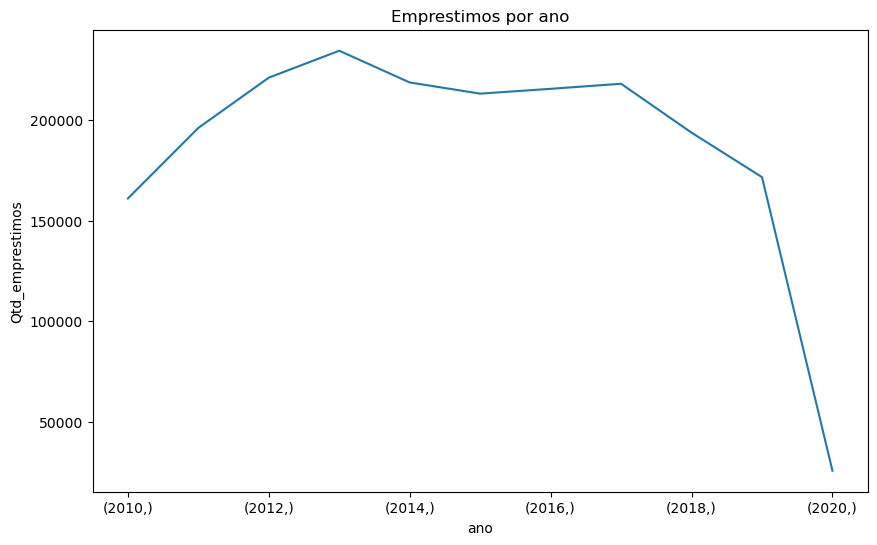

In [15]:
df_ano = pd.DataFrame(df_final['data_emprestimo'].dt.year)
contagem_ano = df_ano.value_counts()
contagem_ano = contagem_ano.sort_index()
contagem_ano.plot(kind='line',figsize=(10,6))
plt.xlabel('ano')
plt.ylabel('Qtd_emprestimos')
plt.title("Emprestimos por ano")


Percebe-se que pelos decoorer dos anos o número de livros alugados estão diminuindo, ou seja os alunos estão lendo menos

*obs: O ano de 2020 não está completo

In [16]:
emprestimos_mes = df_final['data_emprestimo'].dt.month
contagem_mes = emprestimos_mes.value_counts()
contagem_mes = contagem_mes.sort_index()
print(contagem_mes.index)


Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='data_emprestimo')


In [17]:
meses = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr',
         5:'Mai', 6:'Jun', 7:'Jul', 8:'Ago',
         9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}

contagem_mes.index = contagem_mes.index.map(meses)
contagem_mes


data_emprestimo
Jan     67377
Fev    209876
Mar    251851
Abr    208473
Mai    202257
Jun    137897
Jul    123591
Ago    232545
Set    207966
Out    188186
Nov    163968
Dez     75678
Name: count, dtype: int64

In [18]:
sns.set_theme(context='notebook', 
              style='darkgrid', 
              palette='deep', 
              font_scale=1.3, 
              rc={"figure.figsize":(15,8)})

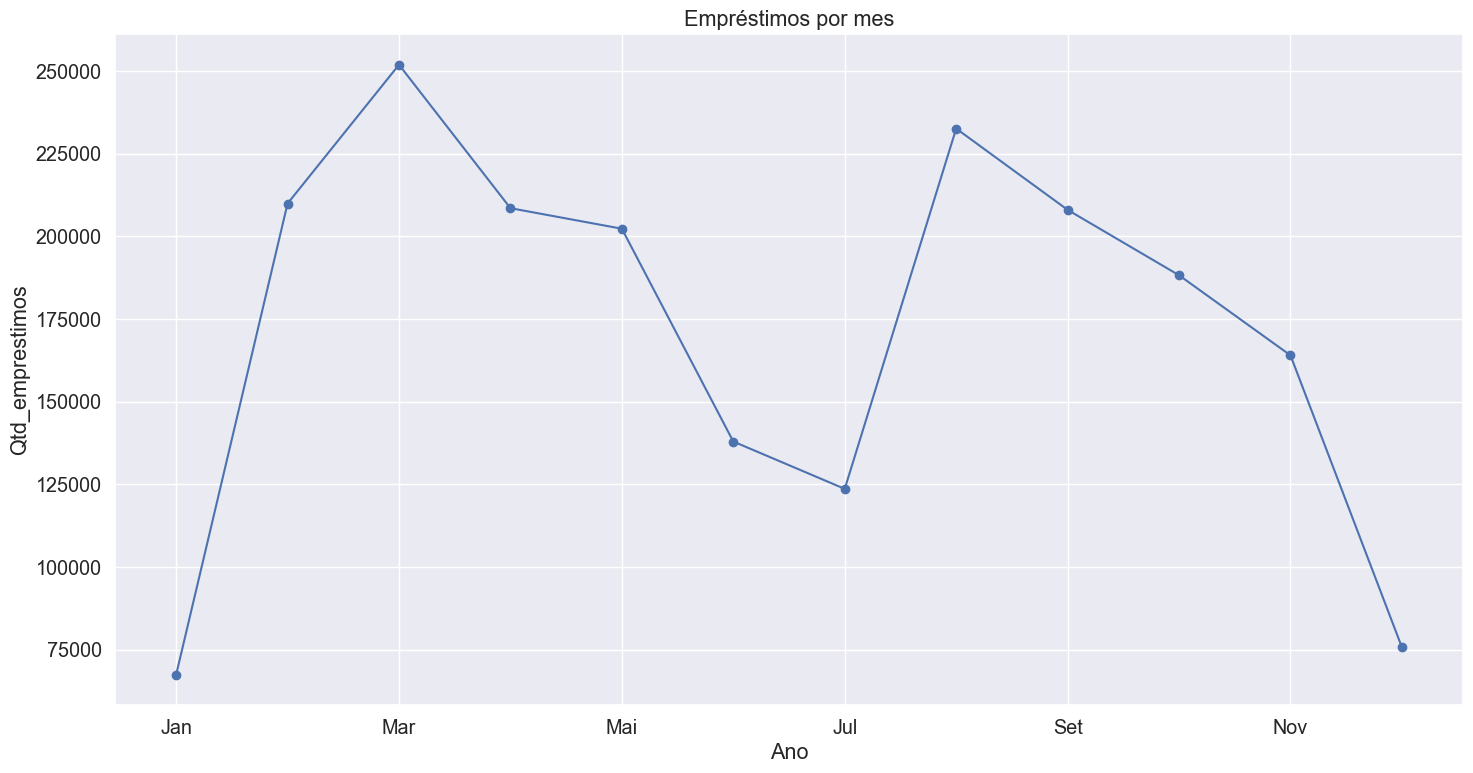

In [19]:
contagem_mes.plot(kind='line', marker='o')
plt.xlabel('Ano')
plt.ylabel('Qtd_emprestimos')
plt.title('Empréstimos por mes')
plt.tight_layout()
plt.show()

Março e agosto são os meses com mais empréstimos e janeiro e dezembro os meses com menos empréstimos de livros na biblioteca.

É importante que as férias dos colaboradores não sejam no mês de março e agosto para evitar sobrecarga dos que não estão de férias.

Para atividades internas, aproveite os meses de menor demanda:

Junho a Julho: Ideal para projetos, workshops e treinamentos.

Outubro a Dezembro: Perfeito para o planejamento anual, balanços e para executar tarefas adiadas durante os picos.

In [20]:
emprestimos_por_horas  = df_final['data_emprestimo'].dt.hour
emprestimos_por_horas = emprestimos_por_horas.value_counts().sort_index()

In [21]:
df_hora = pd.DataFrame(emprestimos_por_horas)
df_hora.columns = ['Quantidade']
df_hora.index.name = 'Horas'
df_hora

,Quantidade
Horas,
0,17
6,13
7,18722
8,103298
9,131082
10,185604
11,179731
12,148508
13,126728


In [22]:
df_hora

,Quantidade
Horas,
0,17
6,13
7,18722
8,103298
9,131082
10,185604
11,179731
12,148508
13,126728


In [23]:
df_hora = df_hora.reset_index().rename(columns={'index': 'Horas'})
df_hora

,Horas,Quantidade
0,0,17
1,6,13
2,7,18722
3,8,103298
4,9,131082
5,10,185604
6,11,179731
7,12,148508
8,13,126728
9,14,150615


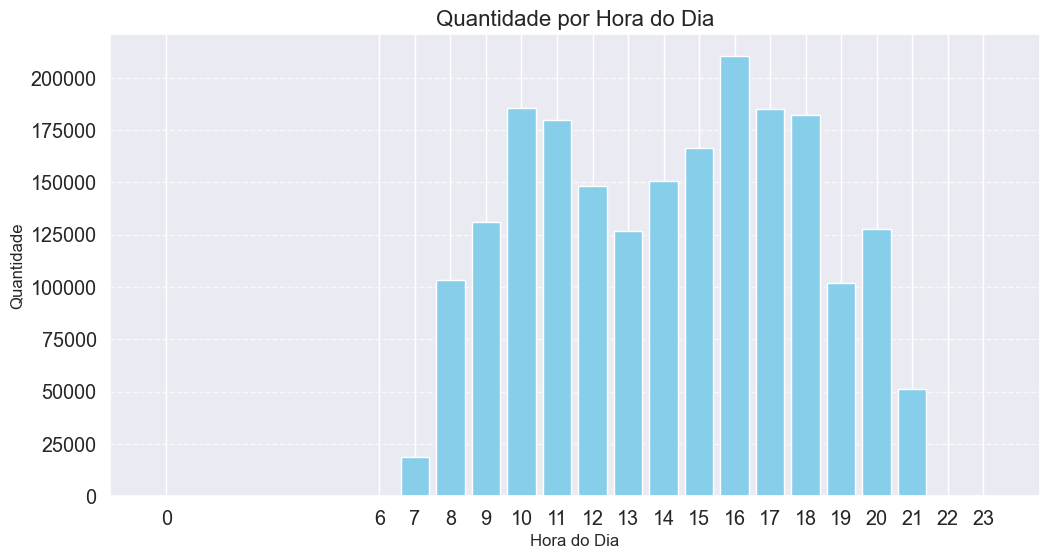

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(df_hora['Horas'], df_hora['Quantidade'], color='skyblue')
plt.title('Quantidade por Hora do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(df_hora['Horas']) # Melhora a visualização do eixo X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dia 4

In [25]:
df_final.head()


,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,id_emprestimo,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,CDU
0,27,L000133_11/05/2018 08:57:56,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,691,818501,NaN,2010-08-17 17:00:04.440,2010/08/17 17:09:15.000000000,2010059654.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
1,43,L000154,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,2037061,2015/08/24 21:55:47.110000000,2015-08-03 10:39:42.972,2015/10/19 08:52:30.000000000,2013034289.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
2,61,L000267_14/07/2017 09:31:00,Dissertações,Biblioteca Central Zila Mamede,ESPECIAL,690,1212301,NaN,2012-03-30 14:35:52.264,2012/04/02 17:06:11.000000000,2011096362.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
3,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,775420,2010/05/31 00:35:54.869000000,2010-05-14 17:58:11.558,2010/06/17 19:34:11.000000000,200428640.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
4,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,800617,2010/07/21 11:39:18.519000000,2010-07-06 12:24:32.049,2010/08/09 17:54:20.000000000,2008031519.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas


In [26]:
df_final.colecao.unique()

array(['Acervo Circulante', 'Dissertações',
       'Publicações de Autores do RN', 'Publicações da UFRN',
       'Obras de Referência', 'Coleção Mossoroense', 'Folhetos', 'Teses',
       'Monografias', 'Eventos', 'Multimeios', 'Coleção Zila Mamede',
       'Literatura de Cordel', 'Obras Raras', 'Trabalho Acadêmico',
       'Necessidades Educacionais Específicas'], dtype=object)

In [27]:
def frequencia(var):

    df_frequencia  = pd.DataFrame(df_final[var].value_counts())
    df_frequencia.columns = ['quantidade']
    df_frequencia['percentual'] = round((df_frequencia.quantidade / df_frequencia.quantidade.sum())*100,1)
    return df_frequencia


In [28]:
frequencia('colecao')

,quantidade,percentual
colecao,,
Acervo Circulante,2050272,99.1
Multimeios,7951,0.4
Monografias,4021,0.2
Dissertações,2406,0.1
Obras de Referência,1953,0.1
Publicações de Autores do RN,863,0.0
Publicações da UFRN,763,0.0
Teses,714,0.0
Folhetos,270,0.0


Observa-se que a coleção mais demandada é a Acervo Circulante, a qual possui 99% de seus exemplares emprestados, o que representa um indicativo preocupante de disponibilidade reduzida.

In [29]:
frequencia('tipo_vinculo_usuario')

,quantidade,percentual
tipo_vinculo_usuario,,
ALUNO DE GRADUAÇÃO,1612251,77.9
ALUNO DE PÓS-GRADUAÇÃO,302459,14.6
DOCENTE,70936,3.4
SERVIDOR TÉCNICO-ADMINISTRATIVO,31997,1.5
ALUNO MÉDIO/TÉCNICO,28032,1.4
DOCENTE EXTERNO,23942,1.2
USUÁRIO EXTERNO,48,0.0


Os dados mostram que 77,9% dos empréstimos de livros foram realizados por alunos de graduação, representando a grande maioria.

In [30]:
frequencia('biblioteca')

,quantidade,percentual
biblioteca,,
Biblioteca Central Zila Mamede,1425572,68.9
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118593,5.7
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77582,3.7
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,64737,3.1
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61154,3.0
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46016,2.2
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40712,2.0
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.6
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29084,1.4


A Biblioteca Central Zila Mamede concentra 68,9% dos empréstimos, confirmando-se como a principal unidade de atendimento. As bibliotecas setoriais têm participação bem menor, destacando-se as da área da saúde (CCS e FACISA). Observa-se, assim, uma forte concentração na Biblioteca Central e subutilização de algumas bibliotecas setoriais.

Dia 5

In [31]:
df_graduacao = pd.DataFrame(df_final[df_final['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO'])
df_graduacao = pd.DataFrame(df_graduacao[df_graduacao['colecao'] == 'Acervo Circulante'])
df_graduacao.head()


,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,id_emprestimo,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,CDU
0,27,L000133_11/05/2018 08:57:56,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,691,818501,NaN,2010-08-17 17:00:04.440,2010/08/17 17:09:15.000000000,2010059654.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
1,43,L000154,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,2037061,2015/08/24 21:55:47.110000000,2015-08-03 10:39:42.972,2015/10/19 08:52:30.000000000,2013034289.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
3,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,775420,2010/05/31 00:35:54.869000000,2010-05-14 17:58:11.558,2010/06/17 19:34:11.000000000,200428640.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
4,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,800617,2010/07/21 11:39:18.519000000,2010-07-06 12:24:32.049,2010/08/09 17:54:20.000000000,2008031519.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas
5,100,L144235,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,650,956901,2011/04/11 17:00:16.980000000,2011-03-25 19:01:29.936,2011/04/26 13:22:01.000000000,2009049284.0,ALUNO DE GRADUAÇÃO,Ciências aplicadas


In [32]:
df_pos_graduacao = pd.DataFrame(df_final[df_final['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO'])
df_pos_graduacao = pd.DataFrame(df_pos_graduacao[df_pos_graduacao['colecao'] == 'Acervo Circulante'])
df_pos_graduacao.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,id_emprestimo,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,CDU
10,102,L136078,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,610,819393,NaN,2010-08-18 15:38:57.170,2010/09/13 17:55:00.000000000,2010101332.0,ALUNO DE PÓS-GRADUAÇÃO,Ciências aplicadas
12,102,L136078,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,610,1251628,2012/06/17 21:20:09.163000000,2012-05-15 13:48:00.656,2012/06/26 15:00:31.000000000,2011107804.0,ALUNO DE PÓS-GRADUAÇÃO,Ciências aplicadas
15,102,L136078,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,610,2037236,2015/08/27 14:39:57.395000000,2015-08-03 12:12:58.055,2015/09/30 12:10:29.000000000,20151014809.0,ALUNO DE PÓS-GRADUAÇÃO,Ciências aplicadas
17,102,L136078,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,610,2988425,NaN,2020-03-17 12:45:58.537,2020/03/18 10:27:27.000000000,2014200437.0,ALUNO DE PÓS-GRADUAÇÃO,Ciências aplicadas
18,103,L136079,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,661,935681,NaN,2011-02-25 11:42:50.705,2011/03/21 16:12:38.000000000,2010103319.0,ALUNO DE PÓS-GRADUAÇÃO,Ciências aplicadas


In [33]:
df_graduacao = pd.DataFrame(df_final[df_final['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO'])
df_graduacao = pd.DataFrame(df_graduacao[df_graduacao['colecao'] == 'Acervo Circulante'])


df_graduacao['ano'] = df_graduacao['data_emprestimo'].dt.year
df_graduacao['mes'] = df_graduacao['data_emprestimo'].dt.month
contagem_graduacao = df_graduacao.groupby(['ano', 'mes']).size()
contagem_graduacao

ano   mes
2010  1       3013
      2       7769
      3      15270
      4      12429
      5      12164
             ...  
2019  11      8807
      12      1980
2020  1       1781
      2       8138
      3       8685
Length: 123, dtype: int64

In [34]:
df_contagem_graduacao = pd.DataFrame(contagem_graduacao)
df_contagem_graduacao.head()

0
ano  mes       
2010 1     3013
     2     7769
     3    15270
     4    12429
     5    12164

In [35]:
df_contagem_graduacao = (
    df_graduacao
    .groupby(['ano', 'mes'])
    .size()
    .reset_index(name='qtd_emprestimos')
)


df_contagem_graduacao



,ano,mes,qtd_emprestimos
0,2010,1,3013
1,2010,2,7769
2,2010,3,15270
3,2010,4,12429
4,2010,5,12164
...,...,...,...
118,2019,11,8807
119,2019,12,1980
120,2020,1,1781
121,2020,2,8138


In [36]:
df_pos_graduacao = pd.DataFrame(df_final[df_final['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO'])
df_pos_graduacao = pd.DataFrame(df_pos_graduacao[df_pos_graduacao['colecao'] == 'Acervo Circulante'])


df_pos_graduacao['ano'] = df_pos_graduacao['data_emprestimo'].dt.year
df_pos_graduacao['mes'] = df_pos_graduacao['data_emprestimo'].dt.month
contagem_pos_graduacao = df_pos_graduacao.groupby(['ano', 'mes']).size()
contagem_pos_graduacao

ano   mes
2010  1      1106
      2      1474
      3      2919
      4      2715
      5      2514
             ... 
2019  12     1069
2020  1      1143
      2      1189
      3      1471
      6         2
Length: 124, dtype: int64

In [37]:
df_contagem_pos_graduacao = (
    df_pos_graduacao
      .groupby(['ano', 'mes'])
      .size()
      .reset_index(name='qtd_emprestimos')
)

df_contagem_pos_graduacao

,ano,mes,qtd_emprestimos
0,2010,1,1106
1,2010,2,1474
2,2010,3,2919
3,2010,4,2715
4,2010,5,2514
...,...,...,...
119,2019,12,1069
120,2020,1,1143
121,2020,2,1189
122,2020,3,1471


<Figure size 1200x600 with 0 Axes>

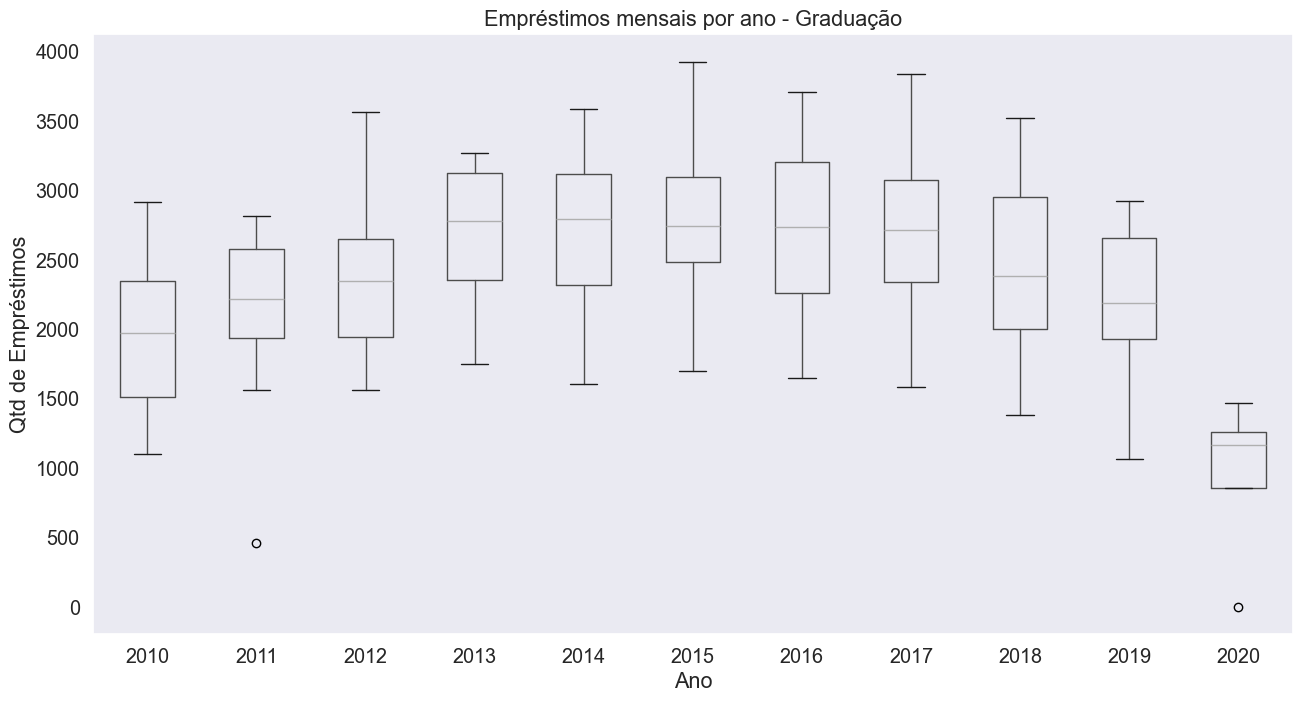

In [38]:
plt.figure(figsize=(12,6))
df_contagem_pos_graduacao.boxplot(
    column='qtd_emprestimos',
    by='ano',
    grid=False
)

plt.suptitle("")  # remove o título automático
plt.title("Empréstimos mensais por ano - Graduação")  # aqui é () não =
plt.xlabel("Ano")
plt.ylabel("Qtd de Empréstimos")
plt.show()


Auge (2012-2018): Período de maior movimento, com volume de empréstimos consistentemente alto e estável.

Ruptura (2020): Queda drástica e repentina na quantidade de empréstimos, certamente devido à pandemia.

Tendência Prévia (2019): O ano de 2019 já indicava uma leve tendência de diminuição nos empréstimos.

Anomalias: Os pontos isolados mostram meses específicos com atividade muito abaixo do padrão normal para seu respectivo ano.

<Figure size 1200x600 with 0 Axes>

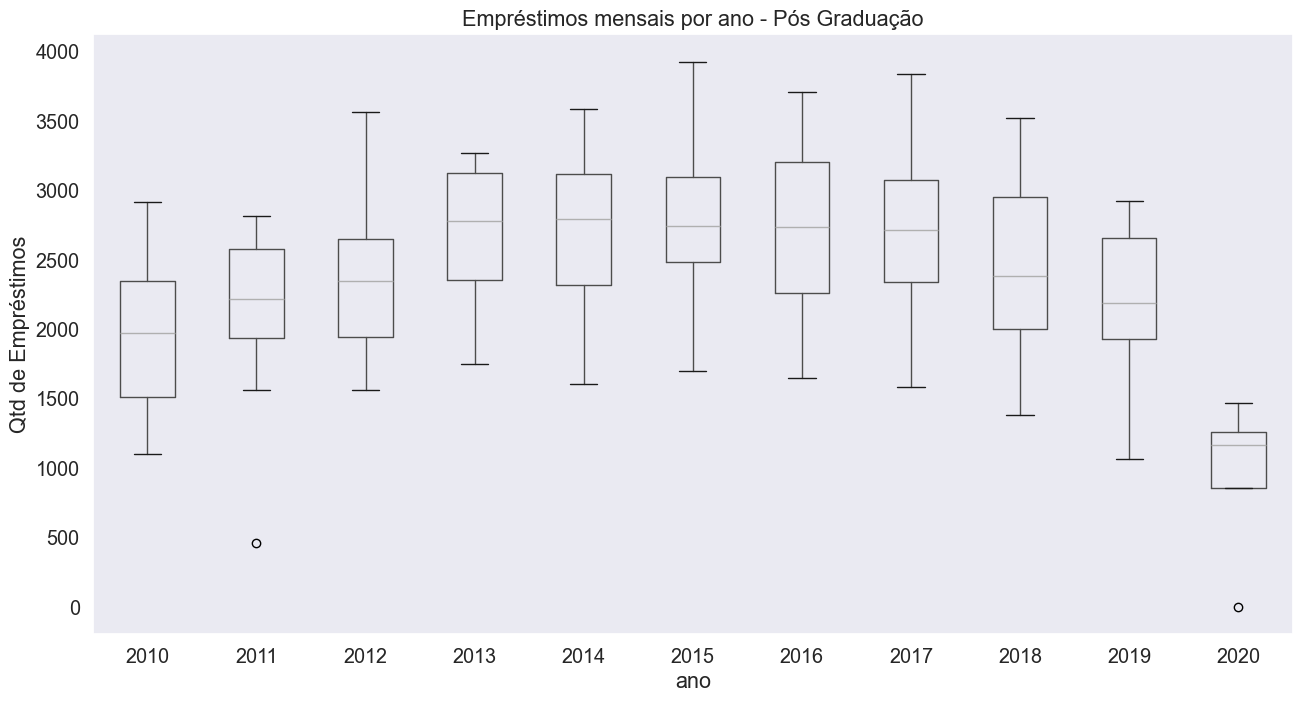

In [39]:
plt.figure(figsize=(12,6))

df_contagem_pos_graduacao.boxplot(
    column='qtd_emprestimos',
    by='ano',
    grid=False
)

plt.suptitle("")  # remove o título automático
plt.title("Empréstimos mensais por ano - Pós Graduação")
plt.xlabel ('ano')
plt.ylabel ('Qtd de Empréstimos')
plt.show()


A análise dos boxplots mostra que entre 2010 e 2015 houve um crescimento gradual no número de empréstimos mensais realizados pelos alunos, indicando maior utilização do acervo nesse período. Em 2015 e 2017 observa-se uma maior dispersão, o que sugere meses de uso muito diferentes dentro do mesmo ano, possivelmente ligados a períodos letivos específicos. A partir de 2018 há uma redução consistente na mediana dos empréstimos, evidenciando queda no ritmo de utilização. O ano de 2020 apresenta uma queda brusca em relação aos anteriores, reflexo direto da pandemia, que reduziu de forma significativa o acesso presencial à biblioteca. Além disso, alguns valores atípicos aparecem ao longo da série, principalmente em 2011 e 2020, reforçando os impactos de variações externas no comportamento de empréstimos.